## Inferential Statistics to [Supervised] Machine Learning
Often, we can use sampling techniques and descriptive statistics to learn more about a population. For example, we might take a sample and calculate various statistics such as average time watching TV, income or educational levels. It is important to note that when we do this, our population statistics may be different then our sample statistics.  

Supervised machine learning applies these same concepts along with additional algorithms in order to mine structure within the data to make predictive models. This always begins with splitting the data into train and test sets so that we can validate our model performance. This process is analagous to if we took multiple samples from a population; assuming our samples are independent and of a sufficient size, we should expect that descriptive measures such as the mean and standard deviation of those samples should be roughly equivalent. Similarly in machine learning, we will train our algorithm to detect and model patterns in the training set. This is typically a random sample of roughly 75% - 80% of the total data available to us. After training a model on this set of data, we can then further test the validity of our model against the remaining hold-out data which (again typically 20-25% of the original data) we intentionally did not train the model on. As you probably have put together, this second hold-out dataset of those observations that we not included in the training is known as the test set.

Implementing a **train-test split** in python is very straightforward using sklearn's built in method. Let's take a look at this in more detail. We start by importing a dataset and choosing X and y values. This is a standard process for all **supervised machine learning** algorithms. A supervised learning algorithm is one in which we feed input examples (X, via the training set) into a model which then attempts to reproduce appropriate output values (Y) associated with those inputs. This can take many forms including regression problems such as, "if I give you a person's height, age, weight, blood pressure, etc. cholestoral level",  to classification problems such as "if I give you details about a plant including color, stem length, and root structure, predict what species it is" or even text processing such as "if I give you a reviewers comments, predict how positive/negative their viewpoint is". All of these problems can initially be formulated as an input output mapping where we are trying to generalize a formula from one space X, to another space y.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#As usual we begin by importing our dataset
df1 = pd.read_csv('features.csv')
print('Length of Dataset: ', len(df1))
print('Column Names:\n', df1.columns)
df1.head()

Length of Dataset:  8190
Column Names:
 Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


# Merging
To date we also haven't looked at combining data from multiple sources. Here, we briefly demonstrate that functionality.

In [7]:
df2 = pd.read_csv('Walmart_Sales_Forecasting.csv')
df2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
final = pd.merge(df1, df2, on=['Store', 'Date']) #which two dataframes to combine, and what columns to merge data in on.
final.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,False
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,False
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,False
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,False
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,False


In [9]:
#For simplicity we simply drop null values here.
final = final.dropna()

In [10]:
#Define X and y
X = final[['Store', 'Temperature', 'Fuel_Price', 'MarkDown1',
           'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
           'CPI', 'Unemployment']] #features we think may help predict y
y = final['Weekly_Sales'] #what we want to predict

In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97056 entries, 6587 to 421569
Data columns (total 15 columns):
Store           97056 non-null int64
Date            97056 non-null object
Temperature     97056 non-null float64
Fuel_Price      97056 non-null float64
MarkDown1       97056 non-null float64
MarkDown2       97056 non-null float64
MarkDown3       97056 non-null float64
MarkDown4       97056 non-null float64
MarkDown5       97056 non-null float64
CPI             97056 non-null float64
Unemployment    97056 non-null float64
IsHoliday_x     97056 non-null bool
Dept            97056 non-null int64
Weekly_Sales    97056 non-null float64
IsHoliday_y     97056 non-null bool
dtypes: bool(2), float64(10), int64(2), object(1)
memory usage: 10.6+ MB


### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

72792 24264 72792 24264


# Machine Learning - Regression
From here, we will apply models in order to predict a given output (y) and compare our error results in the training set to that of the test set. This will help us gauge how generalizable our model is to new data observations.

#### Importing and initializing the model class

In [15]:
from sklearn.linear_model import LinearRegression

#Initialize a regression object
linreg = LinearRegression()

#### Fitting the model to the train data

In [16]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Calculating predictions (y_hat)

In [17]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#### Calculating Residuals

In [18]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#### Calculating Mean Squared Error
A good way to compare overall performance is to compare the mean squarred error for the predicted values on the train and test sets.

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 618121803.8379719
Test Mean Squarred Error: 552992495.2662861


Notice here that our test error is substantially worse then our train error demonstrating that our model is overfit and may not generalize well to future cases.

# Overfitting and Underfitting

A common problem amongst nearly all machine learning algorithms is overfitting and underfitting. An overfit model is not generalizable and will not hold to future cases. An underfit model does not make full use of the information available and produces weaker predictions then is feasible. The following image gives a nice demonstration:

<img src='overfit_underfit.png'>

One simple way to demonstrate overfitting and underfitting is to alter the size of our train test split. By default, scikit learn's built in method allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluating the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

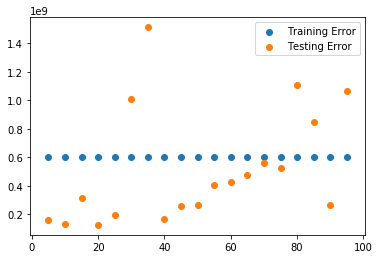

In [22]:
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

# Extension:
Repeat the previous example, but for each train-test split size, generate at least 3 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might result by random chance from those samples. 

In [ ]:
#Your code here